In [9]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key

In [10]:
# create sets of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size= 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# add lats and longs to list
coordinates = list(lat_lngs)
coordinates

[(33.919352017083796, -163.30881459242008),
 (-48.24073989827935, 84.15906411573741),
 (-47.616857143626206, -94.76476511420007),
 (41.68075507167802, -152.27818083424475),
 (63.84049296143914, 131.7765117974846),
 (63.25394067619726, 103.58503992873409),
 (13.907251358670834, 91.34873470868479),
 (27.179939028187363, -88.73995558828187),
 (18.75461586975301, 140.9836874187327),
 (-44.442489789654275, -159.8702458185736),
 (13.307665587954574, -81.67457445799923),
 (-66.79421435856003, -161.73780255627307),
 (-89.4480457081554, -80.684245404139),
 (75.21501911196233, 166.60619788848584),
 (-65.09963790207856, 88.52341785127436),
 (-57.41821148184565, 2.3701952320755595),
 (46.499071383975064, -49.80507202731039),
 (-69.61142990198204, 162.84859340127264),
 (-28.07057471107671, -94.2021276452321),
 (29.753798444955123, -80.30396512316413),
 (44.878281427458745, -9.643321421791455),
 (73.20957494520391, -32.34352412741069),
 (81.10721919864477, -32.65183848932989),
 (60.9391030715326, 56

In [12]:
from citipy import citipy

In [13]:
# Create list for holding cities
cities = []

In [14]:
# Identify nearest city to each set of coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

610

In [20]:
# 1 Import dependencies and declare counters empty list to hold weather data 
import requests
from pprint import pprint
from datetime import datetime

city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# print the beginning of the logging
print('Beginning Data Retrieval      ')
print('------------------------------')

# creat counters
record_count = 1
set_count = 1

# 2 Loop through the cities
for i, city in enumerate(cities):
    
    # 3 Group the cities in sets of 50 to log the process as we find the weather data for each city.
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
    
    # 4 create city url
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # 5 Log the url, record, and set numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to record count
    record_count += 1
    
    # Run API Request for each city
    try:
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        # Parse the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y=%m-%d %H:%M:%S')
        # Append city information into city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                          'Date': city_date
                         })
    # If an error is experienced, skip the city
    except:
        print('City not found.  Skipping...')            
        pass
    
# Indicate that Data Loading is complete
print('----------------------------')
print('Data Retrieval Complete     ')
print('----------------------------')

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | borogontsy
Processing Record 6 of Set 1 | vanavara
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | estelle
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | san andres
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | ormond beach
Processing Record 20 of Set 1 | carballo
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | illoqqortoormiut
City not found.  Skipping...
Processing Record 23 of

Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | yagodnoye
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | pasca
Processing Record 47 of Set 4 | phan thiet
Processing Record 48 of Set 4 | maceio
Processing Record 49 of Set 4 | mount gambier
Processing Record 50 of Set 4 | murwara
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | chirilagua
Processing Record 3 of Set 5 | severobaykalsk
Processing Record 4 of Set 5 | lithgow
Processing Record 5 of Set 5 | pacific grove
Processing Record 6 of Set 5 | ngunguru
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | kudahuvadhoo
Processing Record 9 of Set 5 | samalaeulu
City not found.  Skipping...
Processing Record 10 of Set 5 | toliary
City not found.  Skipping...
Processing Record 11 of Set 5 | deputatskiy
Processing Record 12 of Set 5 | grand gaube
Processing Record 13 

Processing Record 31 of Set 8 | chanute
Processing Record 32 of Set 8 | taoudenni
Processing Record 33 of Set 8 | kalabo
Processing Record 34 of Set 8 | konanur
Processing Record 35 of Set 8 | sabzevar
Processing Record 36 of Set 8 | nisia floresta
Processing Record 37 of Set 8 | brigantine
Processing Record 38 of Set 8 | kandrian
Processing Record 39 of Set 8 | lichinga
Processing Record 40 of Set 8 | mocambique
City not found.  Skipping...
Processing Record 41 of Set 8 | sobolevo
Processing Record 42 of Set 8 | ambilobe
Processing Record 43 of Set 8 | surt
Processing Record 44 of Set 8 | kenai
Processing Record 45 of Set 8 | ketchikan
Processing Record 46 of Set 8 | chuguyevka
Processing Record 47 of Set 8 | alta floresta
Processing Record 48 of Set 8 | azimur
City not found.  Skipping...
Processing Record 49 of Set 8 | majene
Processing Record 50 of Set 8 | nador
Processing Record 1 of Set 9 | aspropirgos
City not found.  Skipping...
Processing Record 2 of Set 9 | turukhansk
Process

Processing Record 18 of Set 12 | byron bay
Processing Record 19 of Set 12 | hami
Processing Record 20 of Set 12 | kuminskiy
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | eden
Processing Record 23 of Set 12 | buala
Processing Record 24 of Set 12 | fort saint john
City not found.  Skipping...
Processing Record 25 of Set 12 | hasanabad
Processing Record 26 of Set 12 | parintins
Processing Record 27 of Set 12 | batagay
Processing Record 28 of Set 12 | halalo
City not found.  Skipping...
Processing Record 29 of Set 12 | couvin
Processing Record 30 of Set 12 | oistins
Processing Record 31 of Set 12 | anchorage
Processing Record 32 of Set 12 | srednekolymsk
Processing Record 33 of Set 12 | makarov
Processing Record 34 of Set 12 | nanpiao
Processing Record 35 of Set 12 | codrington
Processing Record 36 of Set 12 | shingu
Processing Record 37 of Set 12 | malindi
Processing Record 38 of Set 12 | malanje
Processing Record 39 of Set 12 | lewistown
Processing Record 40

In [21]:
len(city_data)

567

In [22]:
# Convert array of dictionaries to Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.99,88,90,13.80,US,2021=01-27 18:28:12
1,Busselton,-33.6500,115.3333,51.01,84,0,11.16,AU,2021=01-27 18:27:30
2,Castro,-24.7911,-50.0119,74.32,87,100,9.35,BR,2021=01-27 18:28:13
3,Kodiak,57.7900,-152.4072,28.40,86,90,1.16,US,2021=01-27 18:27:30
4,Borogontsy,62.6683,131.1683,-48.05,76,100,2.71,RU,2021=01-27 18:28:13
5,Vanavara,60.3400,102.2797,-21.80,84,99,10.67,RU,2021=01-27 18:28:13
6,Port Blair,11.6667,92.7500,79.39,80,97,11.59,IN,2021=01-27 18:27:31
7,Estelle,29.8458,-90.1067,64.99,94,90,14.97,US,2021=01-27 18:28:14
8,Airai,-8.9266,125.4092,61.65,100,100,3.53,TL,2021=01-27 18:28:14
9,Avarua,-21.2078,-159.7750,84.20,70,20,17.27,CK,2021=01-27 18:27:31


In [25]:
# Reorder columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [26]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021=01-27 18:28:12,22.0752,-159.3190,73.99,88,90,13.80
1,Busselton,AU,2021=01-27 18:27:30,-33.6500,115.3333,51.01,84,0,11.16
2,Castro,BR,2021=01-27 18:28:13,-24.7911,-50.0119,74.32,87,100,9.35
3,Kodiak,US,2021=01-27 18:27:30,57.7900,-152.4072,28.40,86,90,1.16
4,Borogontsy,RU,2021=01-27 18:28:13,62.6683,131.1683,-48.05,76,100,2.71
5,Vanavara,RU,2021=01-27 18:28:13,60.3400,102.2797,-21.80,84,99,10.67
6,Port Blair,IN,2021=01-27 18:27:31,11.6667,92.7500,79.39,80,97,11.59
7,Estelle,US,2021=01-27 18:28:14,29.8458,-90.1067,64.99,94,90,14.97
8,Airai,TL,2021=01-27 18:28:14,-8.9266,125.4092,61.65,100,100,3.53
9,Avarua,CK,2021=01-27 18:27:31,-21.2078,-159.7750,84.20,70,20,17.27


In [28]:
# Create output file for data frame (csv)
output_data_file = 'weather_data/cities.csv'
# Export to the output file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

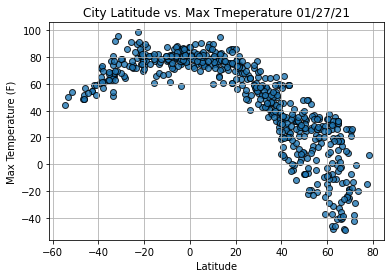

In [32]:
# Import the time module
import time

# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps,
            edgecolor='black', linewidths=1, marker= 'o',
            alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Tmeperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()